In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

deit_train = pd.read_csv('../../networks/birds_deit/logs_train.csv',sep=';')
levit_train = pd.read_csv('../../networks/birds_levit/logs_train.csv',sep=';')
effnet_train = pd.read_csv('../../networks/birds_effnet/logs_train.csv',sep=';')

deit = pd.read_csv('../../networks/birds_deit/logs_valid.csv',sep=';')
levit = pd.read_csv('../../networks/birds_levit/logs_valid.csv',sep=';')
effnet = pd.read_csv('../../networks/birds_effnet/logs_valid.csv',sep=';')

deit_npt = pd.read_csv('../../networks/birds_deit_npt/logs_valid.csv',sep=';')
deit_npt_train = pd.read_csv('../../networks/birds_deit_npt/logs_train.csv',sep=';')

levit_npt = pd.read_csv('../../networks/birds_levit_npt/logs_valid.csv',sep=';')
levit_npt_train = pd.read_csv('../../networks/birds_levit_npt/logs_train.csv',sep=';')

effnet_npt = pd.read_csv('../../networks/birds_effnet_npt/logs_valid.csv',sep=';')
effnet_npt_train = pd.read_csv('../../networks/birds_effnet_npt/logs_train.csv',sep=';')

In [3]:
def plot_by_epoch(col):
    plt.plot(deit['epoch'], deit[col])
    plt.plot(levit['epoch'], levit[col])
    plt.plot(effnet['epoch'], effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = deit['seconds'][0] if offset else 0
    deit_x = deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = levit['seconds'][0]  if offset else 0
    levit_x = levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = effnet['seconds'][0] if offset else 0
    effnet_x = effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,deit[col])
    plt.plot(levit_x ,levit[col])
    plt.plot(effnet_x ,effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

# Training

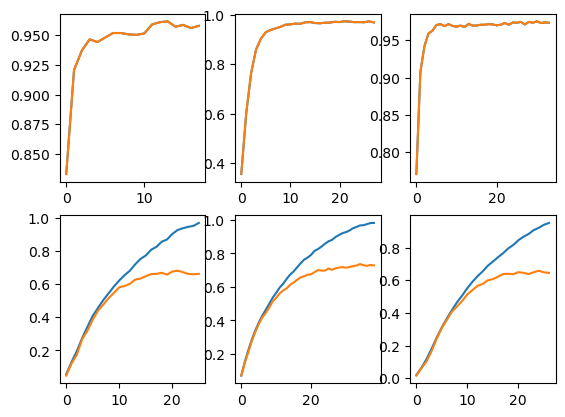

In [4]:
fig, axs = plt.subplots(2,3)
axs[0,0].plot(deit_train['epoch'], deit['top_1_acc'])
axs[0,0].plot(deit['epoch'], deit['top_1_acc'])

axs[0,1].plot(levit_train['epoch'], levit['top_1_acc'])
axs[0,1].plot(levit['epoch'], levit['top_1_acc'])

axs[0,2].plot(effnet_train['epoch'], effnet['top_1_acc'])
axs[0,2].plot(effnet['epoch'], effnet['top_1_acc'])

axs[1,0].plot(deit_npt_train['epoch'], deit_npt_train['top_1_acc'])
axs[1,0].plot(deit_npt['epoch'], deit_npt['top_1_acc'])

axs[1,1].plot(levit_npt_train['epoch'], levit_npt_train['top_1_acc'])
axs[1,1].plot(levit_npt['epoch'], levit_npt['top_1_acc'])

axs[1,2].plot(effnet_npt_train['epoch'], effnet_npt_train['top_1_acc'])
axs[1,2].plot(effnet_npt['epoch'], effnet_npt['top_1_acc'])

# Comparison on Validation Set

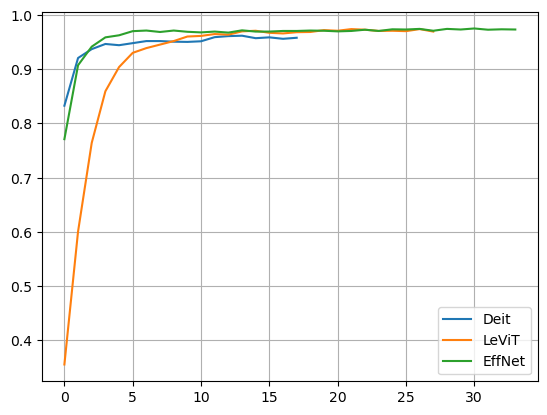

In [5]:
plot_by_epoch('top_1_acc')

In [6]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{effnet[column].median()}")
    print(f"levit:  \t{levit[column].median()}")
    print(f"deit:   \t{deit[column].median()}")

In [7]:
calculate_median('seconds')

median
effnet: 	354.4660017490387
levit:  	307.47423219680786
deit:   	264.06271636486053


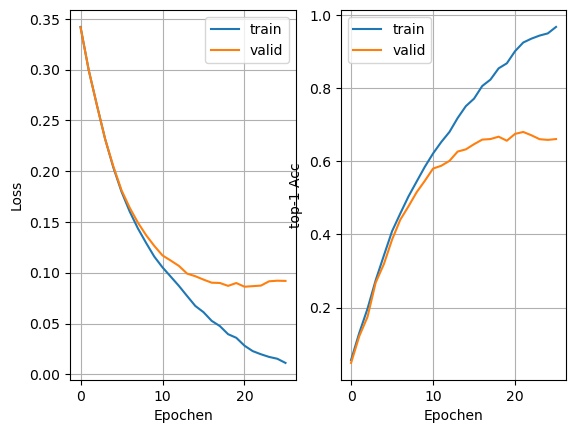

In [8]:
fig, axs = plt.subplots(1,2)

axs[0].plot(deit_npt_train['avr_loss'])
axs[0].plot(deit_npt['avr_loss'])
axs[0].legend(['train','valid'])
axs[0].set_xlabel('Epochen')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

axs[1].plot(deit_npt_train['top_1_acc'])
axs[1].plot(deit_npt['top_1_acc'])
axs[1].legend(['train','valid'])
axs[1].set_xlabel('Epochen')
axs[1].set_ylabel('top-1 Acc')
axs[1].grid(True)


# DeiT

In [9]:
deit['seconds'].sum() / 60

np.float64(79.32917116085689)

In [10]:
deit.median()

epoch          8.500000
seconds      264.062716
avr_loss       0.011607
top_1_acc      0.951810
top_5_acc      0.992000
f1_score       0.951810
precision      0.951810
recall         0.951810
dtype: float64

In [11]:
(deit_train['top_1_acc']-deit['top_1_acc']).max()

0.046922922134399414

In [12]:
levit['seconds'].sum() / 60

np.float64(154.74061864614487)

In [13]:
len(levit)

28

In [14]:
levit.median()

epoch         13.500000
seconds      307.474232
avr_loss       0.010300
top_1_acc      0.966667
top_5_acc      0.995048
f1_score       0.966667
precision      0.966667
recall         0.966667
dtype: float64

In [15]:
levit

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
0,0,746.768368,0.319885,0.355429,0.702095,0.355429,0.355429,0.355429
1,1,307.410618,0.209534,0.600762,0.892952,0.600762,0.600762,0.600762
2,2,309.016149,0.121031,0.764190,0.954667,0.764190,0.764190,0.764190
3,3,304.640594,0.066188,0.859429,0.976381,0.859429,0.859429,0.859429
4,4,306.253860,0.037869,0.904000,0.984762,0.904000,0.904000,0.904000
5,5,308.120457,0.025446,0.930286,0.989714,0.930286,0.930286,0.930286
6,6,307.214402,0.019700,0.939048,0.991619,0.939048,0.939048,0.939048
7,7,305.632163,0.015615,0.945524,0.994286,0.945524,0.945524,0.945524
8,8,307.812384,0.014150,0.952000,0.994286,0.952000,0.952000,0.952000
9,9,307.952769,0.011676,0.960381,0.993524,0.960381,0.960381,0.960381


In [16]:
effnet['seconds'].sum() / 60

np.float64(221.58596291542054)

In [17]:
effnet.median()

epoch         16.500000
seconds      354.466002
avr_loss       0.008078
top_1_acc      0.970667
top_5_acc      0.995048
f1_score       0.970667
precision      0.970667
recall         0.970667
dtype: float64

In [18]:
effnet

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
0,0,1588.622821,0.105480,0.771048,0.937143,0.771048,0.771048,0.771048
1,1,355.587255,0.035272,0.907429,0.982857,0.907429,0.907429,0.907429
2,2,355.631360,0.018689,0.941714,0.992000,0.941714,0.941714,0.941714
3,3,353.735453,0.013419,0.958857,0.994286,0.958857,0.958857,0.958857
4,4,354.724470,0.010945,0.962667,0.995429,0.962667,0.962667,0.962667
5,5,355.047789,0.009160,0.970286,0.995048,0.970286,0.970286,0.970286
6,6,354.454697,0.008707,0.971429,0.996190,0.971429,0.971429,0.971429
7,7,354.705882,0.008332,0.968762,0.995048,0.968762,0.968762,0.968762
8,8,354.422994,0.007931,0.971429,0.994667,0.971429,0.971429,0.971429
9,9,358.076797,0.007996,0.969143,0.995429,0.969143,0.969143,0.969143


In [21]:
deit_npt.tail(5)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
21,21,263.288887,0.086783,0.680762,0.872000,0.680762,0.680762,0.680762
22,22,263.415794,0.087321,0.671619,0.867810,0.671619,0.671619,0.671619
23,23,263.545459,0.091564,0.660952,0.860952,0.660952,0.660952,0.660952
24,24,263.805462,0.092143,0.659048,0.859810,0.659048,0.659048,0.659048
25,25,263.592854,0.091947,0.661333,0.865524,0.661333,0.661333,0.661333


In [20]:
levit_npt.tail(5)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
34,34,308.691926,0.071178,0.736762,0.901333,0.736762,0.736762,0.736762
35,35,307.406981,0.071636,0.730286,0.903238,0.730286,0.730286,0.730286
36,36,305.752656,0.073469,0.725714,0.898286,0.725714,0.725714,0.725714
37,37,308.432882,0.072681,0.731048,0.900190,0.731048,0.731048,0.731048
38,38,305.763392,0.072086,0.728762,0.897524,0.728762,0.728762,0.728762


In [23]:
effnet_npt.tail(8)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
19,19,350.907742,0.094678,0.637333,0.852190,0.637333,0.637333,0.637333
20,20,349.753328,0.092618,0.649524,0.860571,0.649524,0.649524,0.649524
21,21,350.653845,0.091452,0.645714,0.860571,0.645714,0.645714,0.645714
22,22,349.752049,0.094623,0.638095,0.857905,0.638095,0.638095,0.638095
23,23,349.440905,0.093563,0.649524,0.855619,0.649524,0.649524,0.649524
24,24,349.715442,0.094748,0.658286,0.853333,0.658286,0.658286,0.658286
25,25,350.416262,0.094154,0.648762,0.860952,0.648762,0.648762,0.648762
26,26,350.131984,0.096127,0.645333,0.852952,0.645333,0.645333,0.645333
